# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape # 506 data points

(2000, 96)

In [6]:
df_data.columns # column names

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [7]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [8]:
df_data.tail()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0
1999,6221,13.33,14,6.48,1,0,1984,27,30.00,"40,020.00",...,1,0,0,1,0,0,1,0,0,0


In [9]:
df_data.count() # number of rows

ID          2000
EARNINGS    2000
S           2000
EXP         2000
FEMALE      2000
            ... 
MSA11NO     2000
MSA11NCC    2000
MSA11CC     2000
MSA11NK     2000
MSA11NIC    2000
Length: 96, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [11]:
print(f'Any NaN values? {df_data.isna().values.sum()}')

Any NaN values? 8559


In [12]:
print(f'Any duplicates? {df_data.duplicated().values.sum()}')

Any duplicates? 513


In [13]:
print("There are {}".format(df_data.isna().sum().sum()), "missing values left in the dataframe")

There are 8559 missing values left in the dataframe


In [14]:
df_data = df_data.drop_duplicates(keep='first')

In [15]:
print(f'Any duplicates? {df_data.duplicated().values.sum()}')

Any duplicates? 0


In [16]:
print(f'Any NaN values? {df_data.isna().values.sum()}')

Any NaN values? 6290


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

<AxesSubplot:>

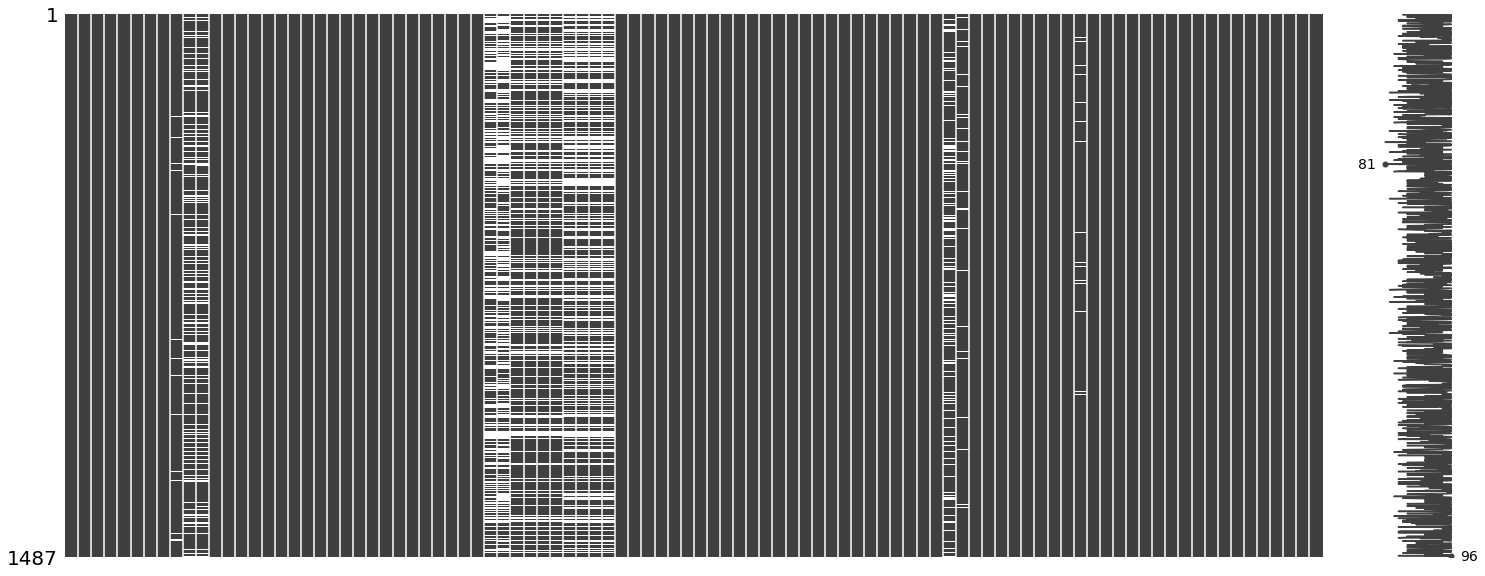

In [18]:
msno.matrix(df_data)

<AxesSubplot:>

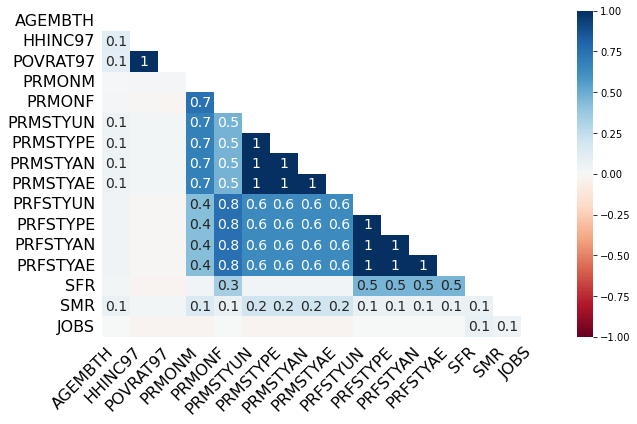

In [19]:
msno.heatmap(df_data, figsize=(10,6))

In [20]:
col_subset_delete = ['PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN','PRMSTYAE','PRFSTYUN','PRFSTYPE','PRFSTYAN',
                     'PRFSTYAE','SFR','SMR', 'AGEMBTH','HHINC97','POVRAT97',]
clean = df_data

In [21]:
clean = clean.drop(axis=1, labels='PRMONM' )
clean = clean.drop(axis=1, labels='PRMONF' )
clean = clean.drop(axis=1, labels='PRMSTYUN' )
clean = clean.drop(axis=1, labels='PRMSTYPE' )
clean = clean.drop(axis=1, labels='PRMSTYAN' )
clean = clean.drop(axis=1, labels='PRMSTYAE' )
clean = clean.drop(axis=1, labels='PRFSTYUN' )
clean = clean.drop(axis=1, labels='PRFSTYPE' )
clean = clean.drop(axis=1, labels='PRFSTYAN' )
clean = clean.drop(axis=1, labels='PRFSTYAE' )
clean = clean.drop(axis=1, labels='SFR' )
clean = clean.drop(axis=1, labels='SMR' )
clean = clean.drop(axis=1, labels='AGEMBTH' )
clean = clean.drop(axis=1, labels='HHINC97' )
clean = clean.drop(axis=1, labels='POVRAT97' )








<AxesSubplot:>

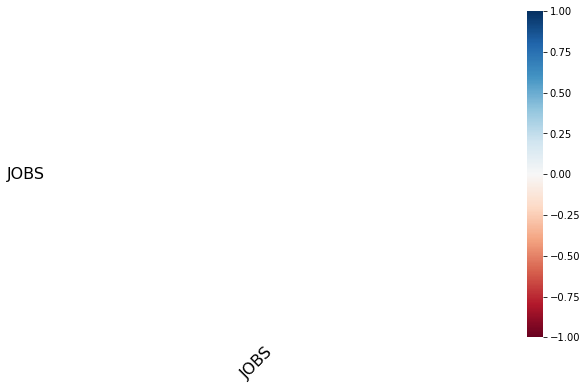

In [22]:
msno.heatmap(clean, figsize=(10,6))

<AxesSubplot:>

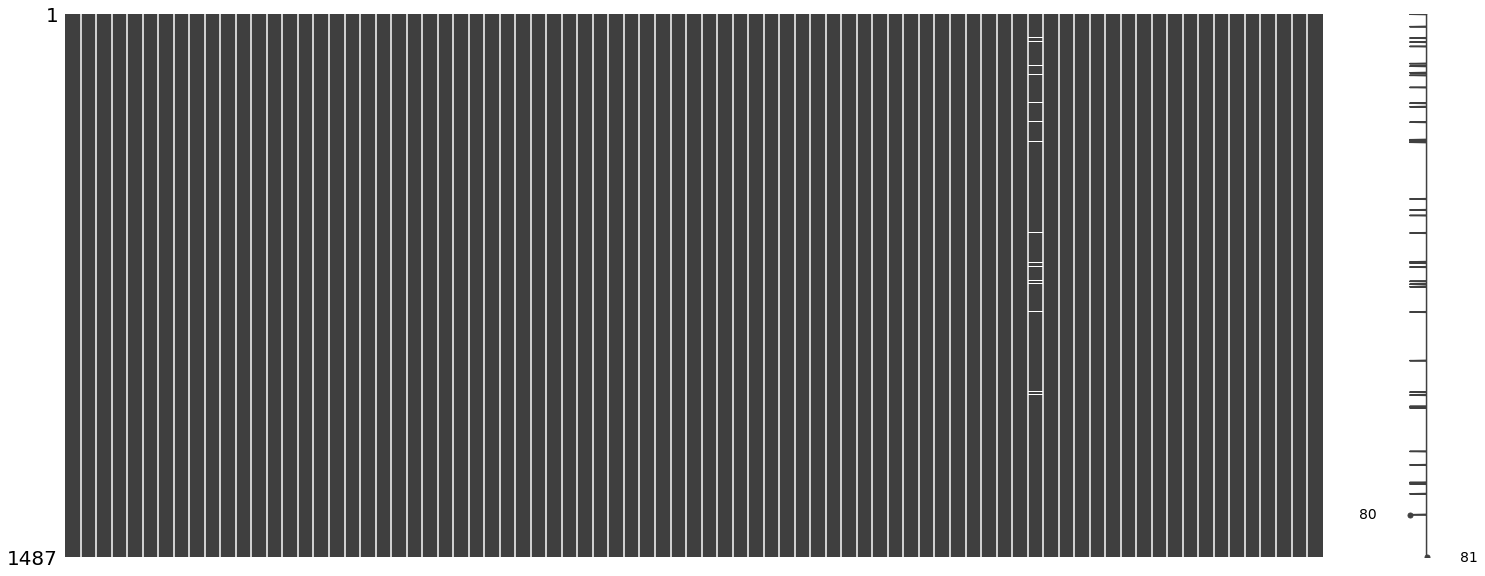

In [23]:
msno.matrix(clean)

In [24]:
clean.dropna(axis=0, how='any', inplace=True)

<AxesSubplot:>

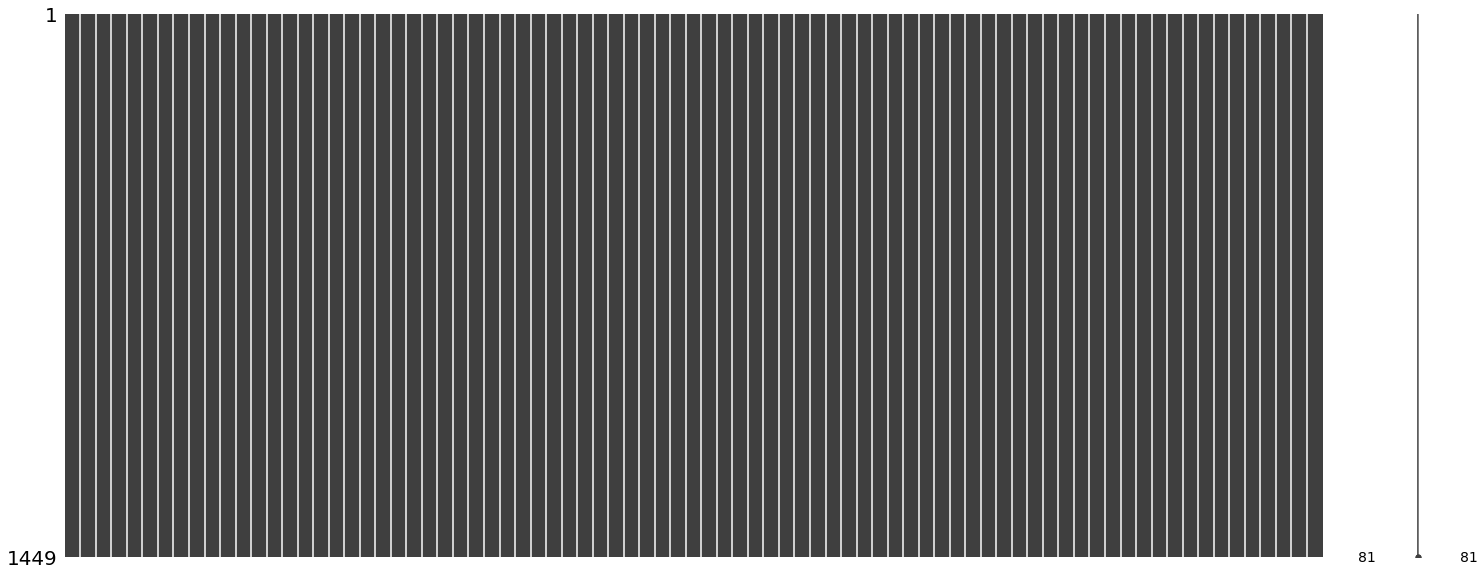

In [25]:
msno.matrix(clean)

In [26]:
print(f'Any NaN values? {clean.isna().values.any()}')

Any NaN values? False


In [27]:
print(f'Any duplicates? {clean.duplicated().values.any()}')

Any duplicates? False


## Descriptive Statistics

In [28]:
clean.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,HHBMBF,HHBMOF,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00",...,"1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00","1,449.00"
mean,"3,538.41",18.86,14.60,6.70,0.49,0.51,"1,982.06",28.94,0.68,0.09,...,0.77,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,006.87",11.98,2.75,2.86,0.50,0.50,1.38,1.38,0.47,0.28,...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.05,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,883.00",11.50,12.00,4.65,0.00,0.00,"1,981.00",28.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,468.00",15.79,15.00,6.62,0.00,1.00,"1,982.00",29.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,153.00",22.60,17.00,8.71,1.00,1.00,"1,983.00",30.00,1.00,0.00,...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,1.00,1.00,...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [29]:
"""
Personal variables
FEMALE D Sex of respondent (0 if male, 1 if female)
MALE D Sex of respondent (1 if male, 0 if female)
Ethnicity:
ETHBLACK D Black
ETHHISP D Hispanic
ETHWHITE D Non-black, non-hispanic
AGE C Age in 2011
BYEAR C Year of birth
HEIGHT C Height, in inches, in 2004
WEIGHT04 C Weight, in pounds, in 2004
WEIGHT11 C Weight, in pounds, in 2011
S C Years of schooling (highest grade completed as of 2011)
Highest educational qualification:
EDUCPROF D Professional degree
EDUCPHD D Doctorate
EDUCMAST D Master's degree
EDUCBA D Bachelor's degree
EDUCAA D Associate's (two-year college) degree
EDUCHSD D High school diploma
EDUCGED D General Educational Development certificate (HSD equivalence)
EDUCDO D High school drop-out
Marital status
SINGLE D Single, never married
MARRIED D Married, spouse present
COHABIT D Cohabiting
OTHSING D Other single
Scaled score on a component of the ASVAB battery
ASVABAR C Arithmetic reasoning
ASVABWK C Word knowledge
ASVABPC C Paragraph comprehension
ASVABNO C Numerical operations (speed test)
ASVABCS C Coding speed (speed test)
ASVABC C Composite of ASVABAR (with double weight), ASVABWK and ASVABPC
ASVABC4 C Composite of ASVABAR, ASVABWK, ASVABPC and math knowledge score
VERBAL C Composite of ASVABWK and ASVABPC
ASVABMV C NLSY constructed math verbal composite
Faith:
FAITHN D None
FAITHC D Catholic
FAITHJ D Jewish
"""

"\nPersonal variables\nFEMALE D Sex of respondent (0 if male, 1 if female)\nMALE D Sex of respondent (1 if male, 0 if female)\nEthnicity:\nETHBLACK D Black\nETHHISP D Hispanic\nETHWHITE D Non-black, non-hispanic\nAGE C Age in 2011\nBYEAR C Year of birth\nHEIGHT C Height, in inches, in 2004\nWEIGHT04 C Weight, in pounds, in 2004\nWEIGHT11 C Weight, in pounds, in 2011\nS C Years of schooling (highest grade completed as of 2011)\nHighest educational qualification:\nEDUCPROF D Professional degree\nEDUCPHD D Doctorate\nEDUCMAST D Master's degree\nEDUCBA D Bachelor's degree\nEDUCAA D Associate's (two-year college) degree\nEDUCHSD D High school diploma\nEDUCGED D General Educational Development certificate (HSD equivalence)\nEDUCDO D High school drop-out\nMarital status\nSINGLE D Single, never married\nMARRIED D Married, spouse present\nCOHABIT D Cohabiting\nOTHSING D Other single\nScaled score on a component of the ASVAB battery\nASVABAR C Arithmetic reasoning\nASVABWK C Word knowledge\nASVA

## Visualise the Features

In [30]:
#

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [48]:
target = clean['EARNINGS']
features = clean.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [49]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [50]:
regression = LinearRegression()

In [51]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(clean, columns=['S'])
 
# Response Variable or Target
y = pd.DataFrame(clean, columns=['EARNINGS']) 
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [52]:
regression.intercept_

array([1.43247807])

In [53]:
regression.coef_

array([[1.1939074]])

In [54]:
regression.score(X, y)

0.07532534463779128

In [55]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(clean, columns=['S'])
 
# Response Variable or Target
y = pd.DataFrame(clean, columns=['EARNINGS']) 
# Find the best-fit line
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X,y)}')

The slope coefficient is: [1.1939074]
The intercept is: 1.4324780725834394
The r-squared is: 0.07532534463779128


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [56]:
#  Yes, the coefficients have the expected sign, because its expected who study more, earns more.

In [57]:
# Its expected to earns about U$ 1,43 more for each additional year of schooling.

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [67]:
predicted_vals = regression.predict(X)
residuals = (y - predicted_vals)

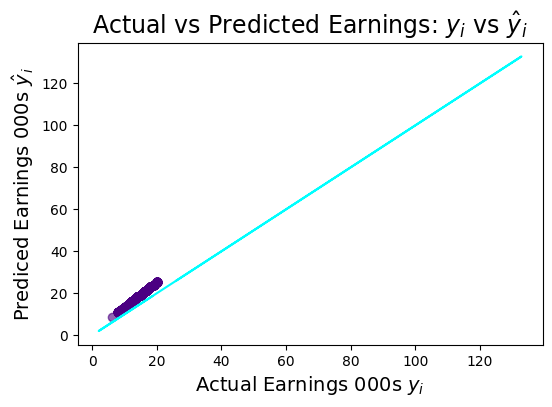

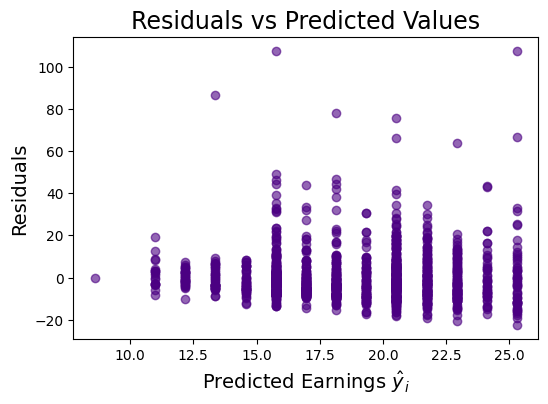

In [74]:
## Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=X, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [24]:
#

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [83]:
target = clean['EARNINGS']
features = clean[['S', 'EXP']]
# features = clean.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [84]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.1


In [85]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


### Evaluate the Coefficients of the Model

In [86]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.75
EXP,0.95


### Analyse the Estimated Values & Regression Residuals

In [87]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

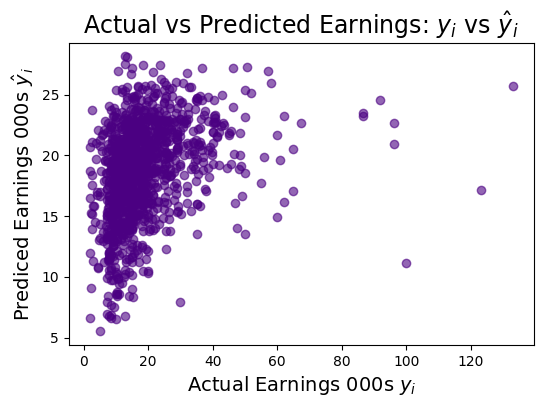

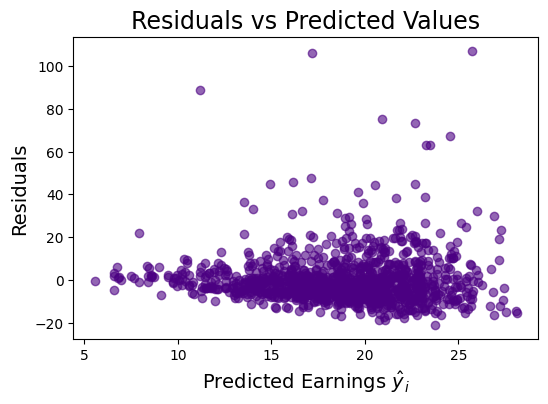

In [95]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
# plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [90]:
regr_coef

,Coefficient
S,1.75
EXP,0.95


In [91]:
1.75 * (12+4) + 0.95 * 5

32.75

In [94]:
# Premium for having an extra room
earningss = regr_coef.loc['S'].values[0] * (12 + 4 ) + regr_coef.loc['EXP'].values[0] * 5

# i.e., ~3.11 * 1000
print(f'The earnings for having 16 years of schooling and 5 years work experience expect is ${earningss:.5}')

The earnings for having 16 years of schooling and 5 years work experience expect is $32.718


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [144]:
clean.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER',
       'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP',
       'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA',
       'EDUCHSD', 'EDUCGED', 'EDUCDO', 'SINGLE', 'MARRIED', 'COHABIT',
       'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM',
       'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS',
       'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04',
       'WEIGHT11', 'SF', 'SM', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S',
       'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE',
       'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN',
       'REGNE', 'REGNC', 'REGW', 'REGS', 'MSA11NO', 'MSA11NCC', 'MSA11CC',
       'MSA11NK', 'MSA11NIC'],
      dtype='object')

In [145]:
target = clean['EARNINGS']
features = clean[['S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER',
       'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP',
       'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA',
       'EDUCHSD', 'EDUCGED', 'EDUCDO', 'SINGLE', 'MARRIED', 'COHABIT',
       'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM',
       'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS',
       'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04',
       'WEIGHT11', 'SF', 'SM', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S',
       'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE',
       'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN',
       'REGNE', 'REGNC', 'REGW', 'REGS', 'MSA11NO', 'MSA11NCC', 'MSA11CC',
       'MSA11NK', 'MSA11NIC']]
# features = clean.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [146]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.3


In [147]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


In [148]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,0.91
EXP,0.83
FEMALE,-0.91
MALE,0.91
BYEAR,0.00
...,...
MSA11NO,-3.38
MSA11NCC,-3.67
MSA11CC,-2.25
MSA11NK,9.30


In [149]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

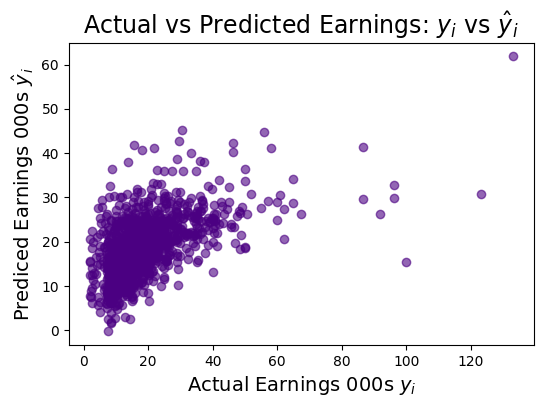

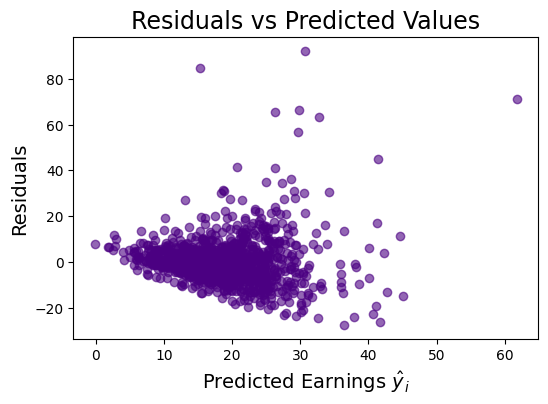

In [150]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
# plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [32]:
#